# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>

In [165]:
#%pip install pandas_datareader

In [166]:
from datafromsource import DataFromSource

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

from numpy.random import random, uniform, dirichlet, choice
from numpy.linalg import inv
from scipy.optimize import minimize
from matplotlib.ticker import FuncFormatter
import math
from datetime import datetime, timedelta
import pandas_datareader.data as web
import datetime as dt

In [168]:
portfolio = [
    'JPM','RY.TO','8058.T','BA','LMT',
    'NVDA','MSFT.O','SAND.K','VLO'
]

In [169]:
from portfoliodata import PortfolioData
portfolio = PortfolioData(portfolio, interval_period="1W", initial = 31*3)
weekly_returns = portfolio.get_portfolio_returns()


JPM
RY.TO
8058.T
BA
LMT
NVDA
MSFT.O
SAND.K
VLO


In [170]:
weekly_returns

,JPM,RY.TO,8058.T,BA,LMT,NVDA,MSFT.O,SAND.K,VLO
Date,,,,,,,,,
2025-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-20,0.037230,0.007406,-0.011310,-0.007868,-0.033211,0.003137,0.005124,-0.022741,0.050809
2025-06-27,0.043094,0.016225,0.019186,0.076495,-0.025767,0.091925,0.038100,-0.011013,-0.046493
2025-07-03,0.030494,NaN,NaN,0.006365,0.008533,NaN,0.005830,0.064331,0.070857
2025-07-11,-0.031365,0.004557,-0.008427,0.049337,0.010731,0.048857,0.008941,0.023603,0.056932
2025-07-18,0.015256,0.009765,-0.006585,0.010961,-0.007622,0.045136,0.013283,-0.029853,-0.046131
2025-07-25,0.024921,-0.006444,0.053811,0.016090,-0.096762,0.039110,0.007150,-0.002092,-0.029018
2025-08-01,-0.031466,-0.019473,-0.002309,-0.049069,-0.000380,-0.002226,0.020043,-0.012645,-0.063914
2025-08-08,-0.002110,0.027180,0.031852,0.032019,0.010914,0.028016,-0.003957,0.099831,0.000826


In [171]:
# Se identifican activos que no tengan la historia de rendimientos completa, los vacios llenar con valor del dia anterior
s = weekly_returns.isnull().apply(sum, axis=0) # count the number of nan in each column
for col in weekly_returns: 
    # rellenar NaNs con el valor de la semana anterior (forward fill)
    weekly_returns[col] = weekly_returns[col].ffill()
weekly_returns

,JPM,RY.TO,8058.T,BA,LMT,NVDA,MSFT.O,SAND.K,VLO
Date,,,,,,,,,
2025-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-20,0.037230,0.007406,-0.011310,-0.007868,-0.033211,0.003137,0.005124,-0.022741,0.050809
2025-06-27,0.043094,0.016225,0.019186,0.076495,-0.025767,0.091925,0.038100,-0.011013,-0.046493
2025-07-03,0.030494,0.016225,0.019186,0.006365,0.008533,0.091925,0.005830,0.064331,0.070857
2025-07-11,-0.031365,0.004557,-0.008427,0.049337,0.010731,0.048857,0.008941,0.023603,0.056932
2025-07-18,0.015256,0.009765,-0.006585,0.010961,-0.007622,0.045136,0.013283,-0.029853,-0.046131
2025-07-25,0.024921,-0.006444,0.053811,0.016090,-0.096762,0.039110,0.007150,-0.002092,-0.029018
2025-08-01,-0.031466,-0.019473,-0.002309,-0.049069,-0.000380,-0.002226,0.020043,-0.012645,-0.063914
2025-08-08,-0.002110,0.027180,0.031852,0.032019,0.010914,0.028016,-0.003957,0.099831,0.000826


In [172]:
weekly_returns.shape


(13, 9)

# Set Parameters

In [173]:
weekly_returns.columns

Index(['JPM', 'RY.TO', '8058.T', 'BA', 'LMT', 'NVDA', 'MSFT.O', 'SAND.K',
       'VLO'],
      dtype='object')

In [174]:
#.4'GOLD.N', .2'TSLA.O', .1'GOOGL.O', .05'MSFT.O', .05'PPG.N', .02'CX.N', .18'GM.N'

In [175]:
stocks = weekly_returns.columns


In [176]:
n_obs, n_assets = weekly_returns.shape
n_assets, n_obs

(9, 13)

In [177]:
NUM_PF = 100000 # no of portfolios to simulate


In [178]:
x0 = uniform(0, 1, n_assets)
x0 /= np.sum(np.abs(x0))
x0

array([0.16028793, 0.07860234, 0.16968921, 0.05038504, 0.09300313,
       0.16220855, 0.10205821, 0.03859195, 0.14517362])

# Annualization Factor


In [179]:
periods_per_year = round(weekly_returns.resample('A').size().mean())
periods_per_year

13

# Compute Mean Returns, Covariance and Precision Matrix


In [180]:
mean_returns = weekly_returns.mean()
cov_matrix = weekly_returns.cov()
cov_matrix

,JPM,RY.TO,8058.T,BA,LMT,NVDA,MSFT.O,SAND.K,VLO
JPM,0.000669,0.000155,0.000118,0.000280,-0.000369,0.000503,0.000104,-0.000167,0.000079
RY.TO,0.000155,0.000304,0.000095,0.000282,0.000283,-0.000063,-0.000060,0.000250,0.000345
8058.T,0.000118,0.000095,0.000406,0.000093,-0.000189,-0.000071,-0.000096,0.000305,-0.000011
BA,0.000280,0.000282,0.000093,0.001154,-0.000140,0.000898,0.000271,0.000131,-0.000067
LMT,-0.000369,0.000283,-0.000189,-0.000140,0.001201,-0.000570,-0.000247,0.000564,0.000721
NVDA,0.000503,-0.000063,-0.000071,0.000898,-0.000570,0.002088,0.000549,0.000059,-0.000436
MSFT.O,0.000104,-0.000060,-0.000096,0.000271,-0.000247,0.000549,0.000299,-0.000302,-0.000511
SAND.K,-0.000167,0.000250,0.000305,0.000131,0.000564,0.000059,-0.000302,0.001398,0.000823
VLO,0.000079,0.000345,-0.000011,-0.000067,0.000721,-0.000436,-0.000511,0.000823,0.002304


In [181]:
precision_matrix = pd.DataFrame(inv(cov_matrix), index=stocks, columns=stocks)
precision_matrix

,JPM,RY.TO,8058.T,BA,LMT,NVDA,MSFT.O,SAND.K,VLO
JPM,8252.541158,-12817.818673,-246.873295,3451.240300,3677.272424,-4192.607500,4581.675708,2809.078714,-198.655882
RY.TO,-12817.818673,31572.720179,-4459.853445,-8605.650630,-9272.891012,7371.494264,-9314.191320,-3307.753631,-1139.480073
8058.T,-246.873295,-4459.853445,8237.012108,-2.240182,3727.889308,765.155572,3088.087730,-2686.984365,1336.787408
BA,3451.240300,-8605.650630,-2.240182,4064.339122,2103.865287,-2397.201938,318.577663,945.974442,-93.164692
LMT,3677.272424,-9272.891012,3727.889308,2103.865287,5065.582406,-999.240025,1889.902622,-630.062699,208.908844
NVDA,-4192.607500,7371.494264,765.155572,-2397.201938,-999.240025,4315.572456,-6969.856530,-2784.432672,-446.279165
MSFT.O,4581.675708,-9314.191320,3088.087730,318.577663,1889.902622,-6969.856530,25222.705943,4538.417501,3322.508703
SAND.K,2809.078714,-3307.753631,-2686.984365,945.974442,-630.062699,-2784.432672,4538.417501,3611.725047,-200.100985
VLO,-198.655882,-1139.480073,1336.787408,-93.164692,208.908844,-446.279165,3322.508703,-200.100985,1273.432413


# Risk-Free Rate

In [182]:
today = dt.date.today()
initial_day = today - dt.timedelta(days=365*5)

In [183]:
treasury_10yr_monthly = (web.DataReader('DGS10', 'fred', initial_day, today)
                         .resample('ME')
                         .last()
                         .div(periods_per_year)
                         .div(100)
                         .squeeze())

In [184]:
treasury_10yr_monthly

DATE
2020-09-30    0.000531
2020-10-31    0.000677
2020-11-30    0.000646
2020-12-31    0.000715
2021-01-31    0.000854
                ...   
2025-05-31    0.003392
2025-06-30    0.003262
2025-07-31    0.003362
2025-08-31    0.003254
2025-09-30    0.003154
Freq: ME, Name: DGS10, Length: 61, dtype: float64

In [185]:
rf_rate = 0.000995


# Simualate Random Portfolios

In [186]:
def simulate_portfolios(mean_ret, cov, rf_rate=rf_rate, short=True):
    alpha = np.full(shape=n_assets, fill_value=.05)
    weights = dirichlet(alpha=alpha, size=NUM_PF)
    if short:
        weights *= choice([-1, 1], size=weights.shape)

    returns = weights @ mean_ret.values + 1
    returns = returns ** periods_per_year - 1
    std = (weights @ weekly_returns.T).std(1)
    std *= np.sqrt(periods_per_year)
    sharpe = (returns - rf_rate) / std
    return pd.DataFrame({'Annualized Standard Deviation': std,
                         'Annualized Returns': returns,
                         'Sharpe Ratio': sharpe}), weights

In [187]:
simul_perf, simul_wt = simulate_portfolios(mean_returns, cov_matrix, short=False)

In [188]:
simul_perf

,Annualized Standard Deviation,Annualized Returns,Sharpe Ratio
0,0.110235,0.268786,2.429261
1,0.100409,-0.034169,-0.350209
2,0.055825,0.183974,3.277732
3,0.102776,0.171178,1.655860
4,0.164053,0.289523,1.758746
...,...,...,...
99995,0.115572,-0.039155,-0.347404
99996,0.101393,0.153325,1.502363
99997,0.130332,0.244584,1.868992
99998,0.173052,0.182975,1.051588


In [189]:
simul_wt

array([[1.48942898e-22, 8.11930868e-08, 3.28611944e-01, ...,
        1.56470684e-11, 2.94974753e-27, 1.47676906e-04],
       [1.11450978e-05, 1.39496972e-19, 8.00942284e-06, ...,
        1.63879369e-01, 6.04746731e-10, 3.66858220e-03],
       [1.50066076e-11, 8.53790279e-01, 1.05146288e-17, ...,
        2.50665061e-02, 5.15086842e-11, 3.16049343e-12],
       ...,
       [6.53925310e-04, 1.99247590e-08, 4.96410711e-12, ...,
        2.22668460e-04, 9.63052856e-01, 5.98768111e-05],
       [8.23472103e-19, 4.12246814e-09, 7.66634221e-15, ...,
        4.99597919e-05, 2.47480016e-43, 9.99949408e-01],
       [1.61979876e-53, 1.39966725e-01, 1.49231705e-01, ...,
        9.76416564e-04, 1.11170556e-06, 5.49988123e-01]],
      shape=(100000, 9))

In [190]:
df = pd.DataFrame(simul_wt)
df.describe()

,0,1,2,3,4,5,6,7,8
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,1.107929e-01,1.096350e-01,1.112878e-01,1.107534e-01,1.107410e-01,1.124459e-01,1.125650e-01,1.114811e-01,1.102978e-01
std,2.611460e-01,2.592550e-01,2.609484e-01,2.604315e-01,2.607799e-01,2.623115e-01,2.632659e-01,2.611514e-01,2.600692e-01
min,8.532181e-105,4.360320e-98,1.064098e-96,2.251978e-92,1.393860e-85,4.339107e-103,1.086537e-95,8.778307e-105,9.924118e-99
25%,5.637902e-12,5.718877e-12,5.620887e-12,5.663877e-12,6.354507e-12,5.937611e-12,6.505297e-12,6.337254e-12,5.901138e-12
50%,5.836853e-06,5.823395e-06,6.479326e-06,6.121266e-06,6.581513e-06,6.237538e-06,6.047929e-06,6.196326e-06,5.942756e-06
75%,1.950214e-02,1.882628e-02,2.046879e-02,2.041086e-02,1.973107e-02,2.161043e-02,1.976593e-02,2.026445e-02,1.959519e-02
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [191]:
df

,0,1,2,3,4,5,6,7,8
0,1.489429e-22,8.119309e-08,3.286119e-01,1.260245e-02,3.535509e-28,6.586378e-01,1.564707e-11,2.949748e-27,1.476769e-04
1,1.114510e-05,1.394970e-19,8.009423e-06,6.198017e-04,8.318131e-01,2.232281e-52,1.638794e-01,6.047467e-10,3.668582e-03
2,1.500661e-11,8.537903e-01,1.051463e-17,3.248475e-13,8.469119e-05,1.210585e-01,2.506651e-02,5.150868e-11,3.160493e-12
3,3.454491e-05,2.760435e-12,1.824897e-01,8.170640e-01,3.629569e-07,4.109431e-04,1.906973e-09,1.560711e-33,4.318072e-07
4,2.826257e-42,5.478485e-14,1.562770e-06,3.363541e-31,3.371400e-03,9.966075e-01,1.251944e-20,3.147367e-12,1.956531e-05
...,...,...,...,...,...,...,...,...,...
99995,5.417691e-02,5.407525e-04,5.283886e-06,8.845547e-15,9.363441e-01,2.617541e-15,2.145378e-06,8.926433e-03,4.379008e-06
99996,2.509530e-01,7.846070e-20,2.842898e-05,4.538252e-03,1.005857e-01,4.386679e-04,1.316818e-11,1.904510e-01,4.530049e-01
99997,6.539253e-04,1.992476e-08,4.964107e-12,3.600596e-02,5.548423e-08,4.640501e-06,2.226685e-04,9.630529e-01,5.987681e-05
99998,8.234721e-19,4.122468e-09,7.666342e-15,2.753061e-09,5.896765e-07,3.580124e-08,4.995979e-05,2.474800e-43,9.999494e-01


# Plot Simulated Portfolios

Max Sharpe: 3.16%, 14.31%


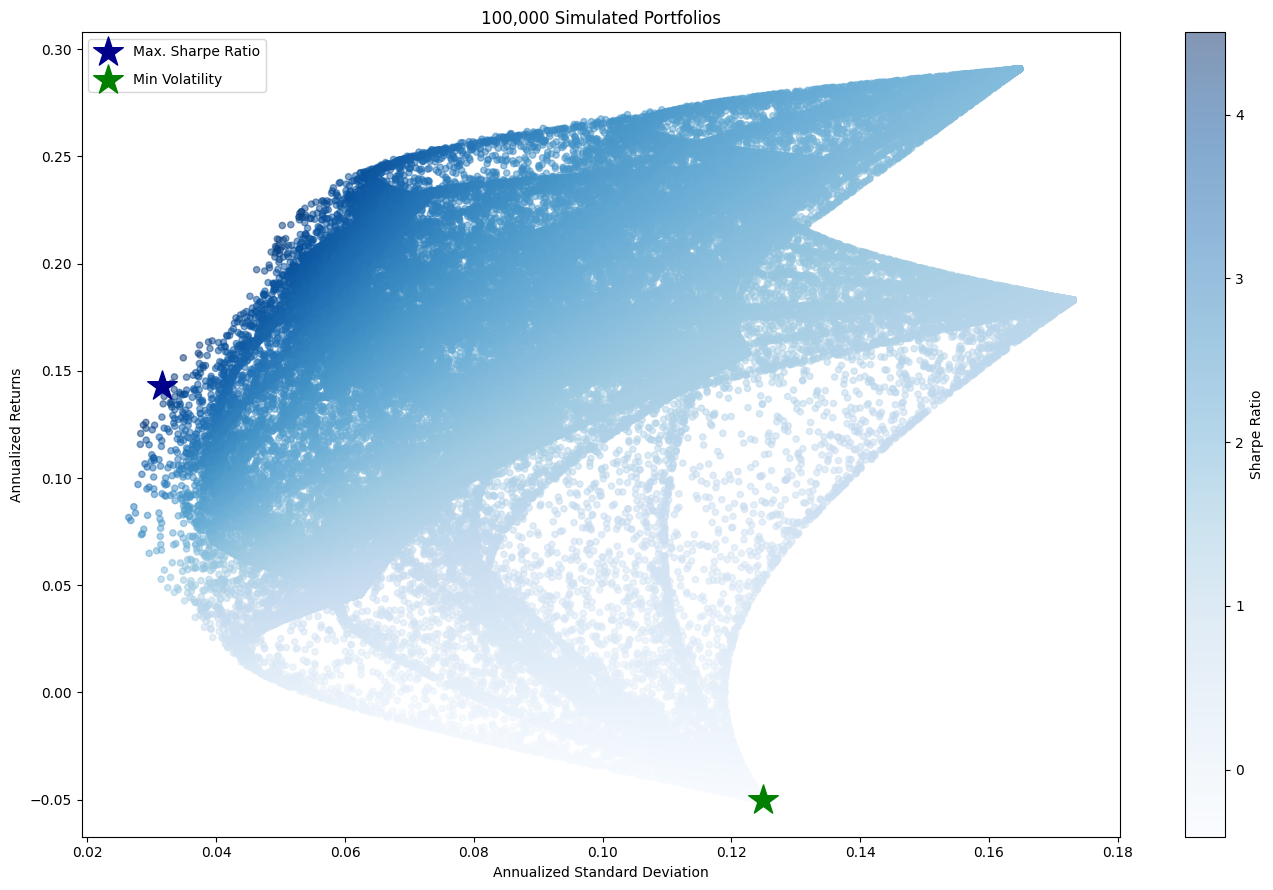

In [192]:
import warnings
warnings.filterwarnings('ignore')
ax = simul_perf.plot.scatter(x=0, y=1, c=2, cmap='Blues',
                             alpha=0.5, figsize=(14, 9), colorbar=True,
                             title=f'{NUM_PF:,d} Simulated Portfolios')

#max_sharpe_idx = simul_perf.iloc[:, 2].idxmax()
max_sharpe_idx = np.where(simul_perf.iloc[:, 2] == simul_perf.iloc[:, 2].max())[0][0]
sd, r = simul_perf.iloc[max_sharpe_idx, :2].values
print(f'Max Sharpe: {sd:.2%}, {r:.2%}')
ax.scatter(sd, r, marker='*', color='darkblue', s=500, label='Max. Sharpe Ratio')

#min_vol_idx = simul_perf.iloc[:, 0].idxmin()
min_vol_idx = np.where(simul_perf.iloc[:, 2] == simul_perf.iloc[:, 2].min())[0][0]
sd, r = simul_perf.iloc[min_vol_idx, :2].values
ax.scatter(sd, r, marker='*', color='green', s=500, label='Min Volatility')
plt.legend(labelspacing=1, loc='upper left')
plt.tight_layout()

# Compute Annualize PF Performance



Now we'll set up the quadratic optimization problem to solve for the minimum standard deviation for a given return or the maximum SR.

To this end, define the functions that measure the key metrics:

In [193]:
def portfolio_std(wt, rt=None, cov=None):
    """Annualized PF standard deviation"""
    return np.sqrt(wt @ cov @ wt * periods_per_year)

In [194]:
def portfolio_returns(wt, rt=None, cov=None):
    """Annualized PF returns"""
    return (wt @ rt + 1) ** periods_per_year - 1

In [195]:
def portfolio_performance(wt, rt, cov):
    """Annualized PF returns & standard deviation"""
    r = portfolio_returns(wt, rt=rt)
    sd = portfolio_std(wt, cov=cov)
    return r, sd

# Max Sharpe PF

Define a target function that represents the negative SR for scipy's minimize function to optimize, given the constraints that the weights are bounded by [-1, 1], if short trading is permitted, and [0, 1] otherwise, and sum to one in absolute terms.

In [196]:
def neg_sharpe_ratio(weights, mean_ret, cov):
    r, sd = portfolio_performance(weights, mean_ret, cov)
    return -(r - rf_rate) / sd

In [197]:
weight_constraint = {'type': 'eq', 
                     'fun': lambda x: np.sum(np.abs(x))-1}

In [198]:
def max_sharpe_ratio(mean_ret, cov, short=False):
    return minimize(fun=neg_sharpe_ratio,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=((-1 if short else 0, 1),) * n_assets,
                    constraints=weight_constraint,
                    options={'tol':1e-10, 'maxiter':10000})

# Compute Efficient Frontier

In [199]:
def min_vol_target(mean_ret, cov, target, short=False):

    def ret_(wt):
        return portfolio_returns(wt, mean_ret)

    constraints = [{'type': 'eq',
                    'fun': lambda x: ret_(x) - target},
                   weight_constraint]

    bounds = ((-1 if short else 0, 1),) * n_assets
    return minimize(portfolio_std,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=bounds,
                    constraints=constraints,
                    options={'tol': 1e-10, 'maxiter': 10000})

# Min Volatility Portfolio

In [200]:
def min_vol(mean_ret, cov, short=False):
    bounds = ((-1 if short else 0, 1),) * n_assets

    return minimize(fun=portfolio_std,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=bounds,
                    constraints=weight_constraint,
                    options={'tol': 1e-10, 'maxiter': 10000})

In [201]:
def efficient_frontier(mean_ret, cov, ret_range, short=False):
    return [min_vol_target(mean_ret, cov, ret) for ret in ret_range]

## Run Calculation

## Get random PF

In [202]:
simul_perf, simul_wt = simulate_portfolios(mean_returns, cov_matrix, short=False)


In [203]:
print(simul_perf.describe())


       Annualized Standard Deviation  Annualized Returns   Sharpe Ratio
count                  100000.000000       100000.000000  100000.000000
mean                        0.097050            0.153927       1.706637
std                         0.034645            0.083178       0.958419
min                         0.027811           -0.050218      -0.409801
25%                         0.065702            0.116178       1.201727
50%                         0.092393            0.169758       1.725716
75%                         0.122246            0.216769       2.327047
max                         0.173063            0.290844       4.392709


In [204]:
simul_max_sharpe = np.where(simul_perf.iloc[:, 2] == simul_perf.iloc[:, 2].max())[0][0]
simul_perf.iloc[simul_max_sharpe]

Annualized Standard Deviation    0.031330
Annualized Returns               0.138619
Sharpe Ratio                     4.392709
Name: 8196, dtype: float64

# Get Max Sharpe PF

In [205]:
max_sharpe_pf = max_sharpe_ratio(mean_returns, cov_matrix, short=False)
max_sharpe_perf = portfolio_performance(max_sharpe_pf.x, mean_returns, cov_matrix)

In [206]:
r, sd = max_sharpe_perf
pd.Series({'ret': r, 'sd': sd, 'sr': (r-rf_rate)/sd})

ret    0.136531
sd     0.029606
sr     4.578020
dtype: float64

# Get Min Vol PF

In [207]:
min_vol_pf = min_vol(mean_returns, cov_matrix, short=False)
min_vol_perf = portfolio_performance(min_vol_pf.x, mean_returns, cov_matrix)

In [208]:
ret_range = np.linspace(simul_perf.iloc[:, 1].min(), simul_perf.iloc[:, 1].max(), 50)
eff_pf = efficient_frontier(mean_returns, cov_matrix, ret_range, short=True)
eff_pf = pd.Series(dict(zip([p['fun'] for p in eff_pf], ret_range)))

# Plot Result

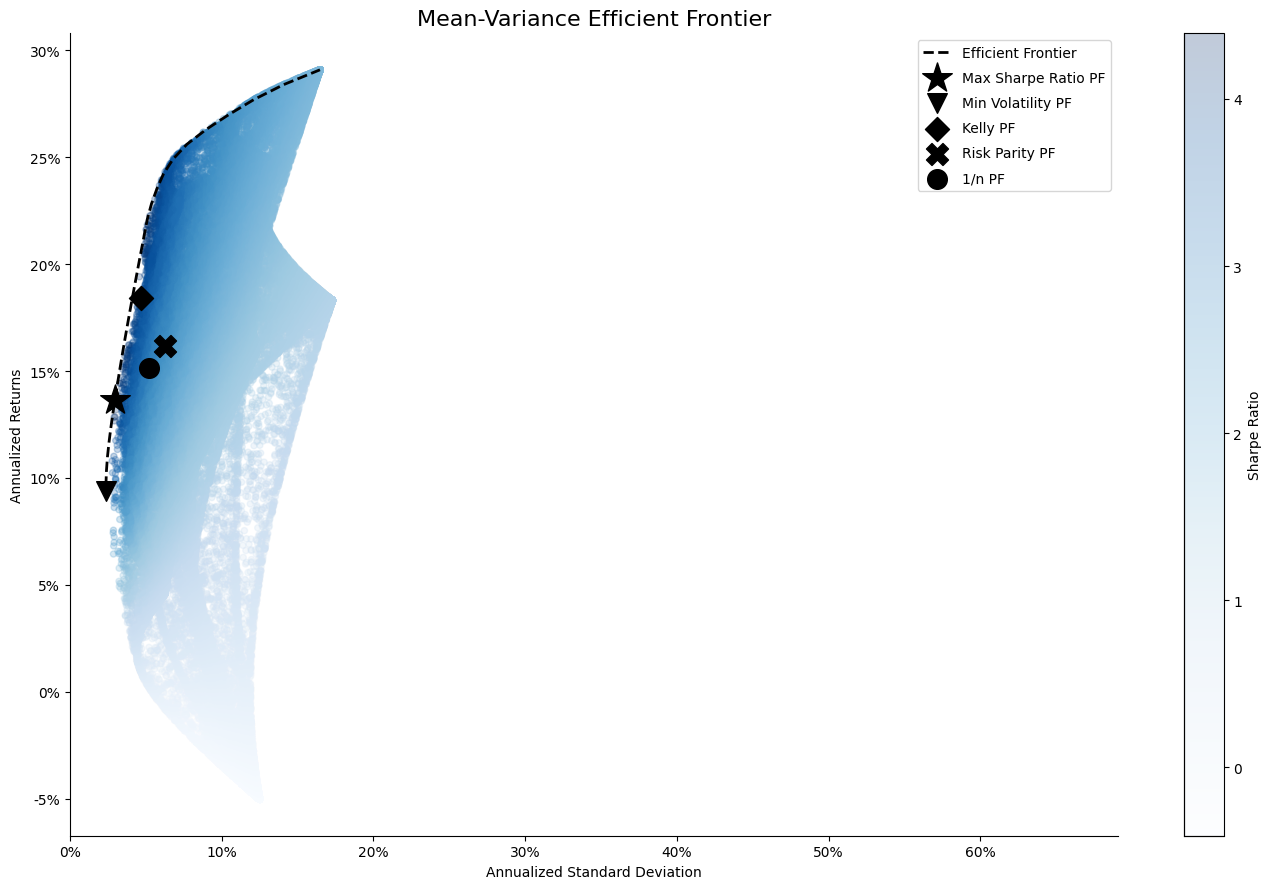

In [209]:
fig, ax = plt.subplots()
simul_perf.plot.scatter(x=0, y=1, c=2, ax=ax, cmap='Blues',alpha=0.25, 
                        figsize=(14, 9), colorbar=True)

eff_pf[eff_pf.index.min():].plot(linestyle='--', lw=2, ax=ax, c='k',
                                 label='Efficient Frontier')

r, sd = max_sharpe_perf
ax.scatter(sd, r, marker='*', color='k', s=500, label='Max Sharpe Ratio PF')

r, sd = min_vol_perf
ax.scatter(sd, r, marker='v', color='k', s=200, label='Min Volatility PF')

kelly_wt = precision_matrix.dot(mean_returns).clip(lower=0).values
kelly_wt /= np.sum(np.abs(kelly_wt))
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)
ax.scatter(sd, r, marker='D', color='k', s=150, label='Kelly PF')

std = weekly_returns.std()
std /= std.sum()
r, sd = portfolio_performance(std, mean_returns, cov_matrix)
ax.scatter(sd, r, marker='X', color='k', s=250, label='Risk Parity PF')

r, sd = portfolio_performance(np.full(n_assets, 1/n_assets), mean_returns, cov_matrix)
ax.scatter(sd, r, marker='o', color='k', s=200, label='1/n PF')


ax.legend(labelspacing=0.8)
ax.set_xlim(0, eff_pf.max()+.4)
ax.set_title('Mean-Variance Efficient Frontier', fontsize=16)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine()
fig.tight_layout();

In [210]:
kelly_wt = precision_matrix.dot(mean_returns).clip(lower=0).values
kelly_wt /= np.sum(np.abs(kelly_wt))
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)

In [211]:
kelly_wt

array([0.        , 0.52881275, 0.15957539, 0.        , 0.        ,
       0.14430468, 0.11291478, 0.        , 0.05439239])

In [212]:
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)


In [213]:
print(r, sd)

0.1840062781148506 0.046474102521089675


In [214]:
max_sharpe_pf['x']


array([5.45378383e-14, 1.05720001e-01, 3.58932625e-01, 7.62558599e-14,
       2.38364440e-02, 6.62278808e-03, 3.96591660e-01, 2.46428900e-03,
       1.05832192e-01])

In [215]:
max_sharpe_pf


     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -4.578020049927329
           x: [ 5.454e-14  1.057e-01  3.589e-01  7.626e-14  2.384e-02
                6.623e-03  3.966e-01  2.464e-03  1.058e-01]
         nit: 17
         jac: [ 2.614e+00 -3.118e-01 -3.113e-01  5.697e+00 -3.130e-01
               -3.059e-01 -3.090e-01 -3.124e-01 -3.157e-01]
        nfev: 180
        njev: 17
 multipliers: [-3.109e-01]

In [216]:
r

np.float64(0.1840062781148506)

In [219]:
x0 = uniform(0, 1, n_assets)
x0 /= np.sum(np.abs(x0))
x0

from scipy.optimize import minimize

# Supón que n_assets ya está definido
bounds = [(0.05, 0.2)] * n_assets  # mínimo 5%, máximo 35% por acción

def funcion_objetivo(weights):
    mean_returns = weekly_returns.mean()
    cov_matrix = weekly_returns.cov()
    port_return = np.dot(weights, mean_returns)
    port_vol = np.sqrt(np.dot(weights, np.dot(cov_matrix, weights)))
    # Negativo porque minimize busca el mínimo
    return -port_return / port_vol

# Ejemplo de llamada al optimizador:
result = minimize(
    fun=funcion_objetivo,         # tu función objetivo (sin paréntesis)
    x0=x0,                        # punto inicial
    bounds=bounds,                # límites por acción
    constraints={                 # suma de pesos = 1
        'type': 'eq',
        'fun': lambda x: np.sum(x) - 1
    }
)

result

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -0.9636040020197255
           x: [ 6.131e-02  2.000e-01  2.000e-01  5.000e-02  5.000e-02
                8.632e-02  2.000e-01  7.827e-02  7.411e-02]
         nit: 9
         jac: [ 2.880e-01 -4.236e-02 -6.654e-01  9.897e-01  6.742e-01
                2.882e-01 -1.402e-01  2.879e-01  2.878e-01]
        nfev: 92
        njev: 9
 multipliers: [ 2.880e-01]